In [19]:
#from libs.prefect_helpers import *
from libs.data_manipulation import *
from libs.feature_generation import *
from libs.dim_reduction import *
from libs.football_plots import *
from libs.clustering import *
from libs.convex_hull import *

import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from libs.InteractivePitchUI import InteractivePitch, PitchDisplay

from mplsoccer import *
import pandas as pd
import numpy as np
import os
# Click player into the pitch and take those player and apply Ripleys K to them. And then maybe PCA


In [20]:
# Step 6: Extract match data from tracking data
data = compile_team_tracking_data("data/H_EURO2024GERMANY", "Denmark")
print(data.head())
one_match = extract_one_match(data, 4)


   Time [s]_team half_team  minute_team  Period_team   home_6_x  home_6_y  \
0           0.00        1H            0            1  18.863983  6.937420   
1           0.04        1H            0            1  18.860191  6.943985   
2           0.08        1H            0            1  18.856722  6.951682   
3           0.12        1H            0            1  18.853645  6.960831   
4           0.16        1H            0            1  18.851160  6.971420   

   home_18_x  home_18_y   home_1_x  home_1_y  ...  away_16_x  away_16_y  \
0  16.191383  27.790174  52.532173 -0.016596  ...        NaN        NaN   
1  16.196404  27.782358  52.532738 -0.013765  ...        NaN        NaN   
2  16.200035  27.776085  52.534679 -0.010368  ...        NaN        NaN   
3  16.201321  27.769873  52.537842 -0.006824  ...        NaN        NaN   
4  16.199764  27.763958  52.543060 -0.003730  ...        NaN        NaN   

   away_25_x  away_25_y  home_26_x  home_26_y  away_3_x  away_3_y  away_15_x  \
0     

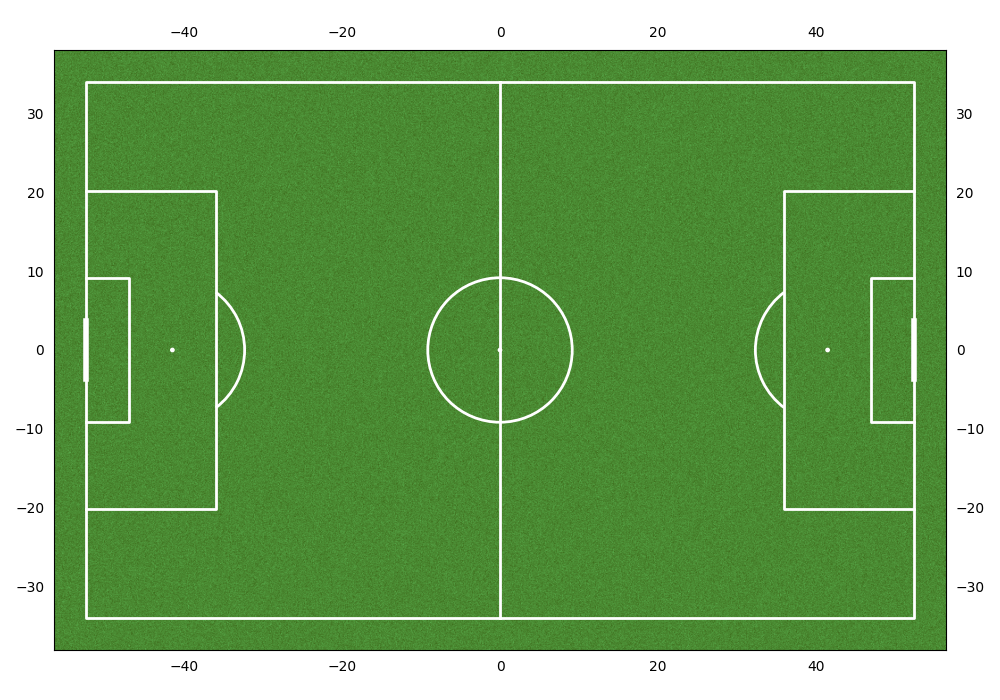

Cleared the current situation. All players are available for selection again.
Ball placement mode enabled. Click to place the ball on the pitch.
Ball placed at: (np.float64(51.60807259334966), np.float64(-32.3500272761072))
Vector drawing mode enabled. Select start and end points for the vector.
Situation saved! Total saved situations: 1
Cleared the current situation. All players are available for selection again.
Loaded Situation 1
{'home_1_x': np.float64(51.86146738592471), 'home_1_y': np.float64(-33.36360644640744), 'home_2_x': np.float64(43.11934704208517), 'home_2_y': np.float64(0.33790096607543063), 'home_3_x': np.float64(50.0877038378993), 'home_3_y': np.float64(3.885428062126259), 'home_4_x': np.float64(49.83430904532425), 'home_4_y': np.float64(-1.1824677893749254), 'home_5_x': np.float64(50.46779602676189), 'home_5_y': np.float64(-4.223205300275637), 'home_6_x': np.float64(46.28678194927342), 'home_6_y': np.float64(-3.716415715125514), 'home_7_x': np.float64(46.28678194927342

In [ ]:
%matplotlib widget

interactive_pitch = InteractivePitch(one_match)


In [27]:
index_displayer = None

In [28]:
if (len(interactive_pitch.vectors) < 1):
    index_displayer = PitchDisplay(one_match,interactive_pitch.similar_situation_indices)

In [29]:
from libs.similar_movement import *
if (len(interactive_pitch.vectors) > 0):
    distance_index_list = find_similar_movement_given_vector(one_match, interactive_pitch.vectors[0] , interactive_pitch.similar_situation_indices )
else:
    distance_index_list = find_similar_movement(one_match, index_displayer.get_selected_index(), interactive_pitch.similar_situation_indices )

10848
29073
255342
459394
570785
255294
491023
491119
491071
542160
406804
255711
392102
542208
570938
406041
542352
542256
251943
542304
78118
78432
459442
472823
30623
542400
29121
124150
206347
255759
212276
123478
123526
391317
115424
141557
30671
406852
405993
33783
405945
92478
115712
123574
115760
542448
251991
459490
513685
252039
252087
252135
252183
252231
255999
252279
391622
391670
255951
115664
391862
391910
123910
391958
255807
391766
392054
123718
78480
256047
123958
124054
124102
392006
459778
255903
459730
391718
391814
459874
459826
124006
459682
459922
30815
459634
31055
123862
255855
459586
459538
30719
30959
30261
115616
31007
30911
30405
30863
30357
29925
31103
29973
30309
30021
30069
115568
29877
115808
29829
30213
29781
30165
30117
570986
29685
123430
123814
123670
542496
29733
123766
30767
123622
115520
115952
116000
116048
115472
115856
115904
542880
542832
542736
542688
542784
542592
542544
542640
141509
571226
571178
571034
571130
571082
33735
460258
460210


In [30]:
distance_index_list = sorted(distance_index_list, key = lambda x : x[0])

In [ ]:
index_displayer_2 = PitchDisplay(one_match, [index for (_,index) in distance_index_list])

In [33]:
print(distance_index_list[0][0]) 
print(distance_index_list)

290.3630614390209
[(290.3630614390209, np.int64(141557)), (302.6565124164895, np.int64(141509)), (315.71973897961396, np.int64(30357)), (318.9222268213927, np.int64(116000)), (326.5333054685447, np.int64(124102)), (328.1684140787123, np.int64(542832)), (329.94176628731367, np.int64(124150)), (342.20166491761944, np.int64(392006)), (349.053529249791, np.int64(78118)), (355.86249447993595, np.int64(30405)), (357.4988532640179, np.int64(406900)), (364.1205462368349, np.int64(542880)), (371.8784694081371, np.int64(571178)), (373.02817240009574, np.int64(116048)), (379.7621033455205, np.int64(392054)), (388.0447137800894, np.int64(124054)), (388.2932669706841, np.int64(571226)), (394.25412685068744, np.int64(78070)), (399.8033279386716, np.int64(348315)), (411.1745275213458, np.int64(252231)), (419.77011616071917, np.int64(472823)), (454.5568094999224, np.int64(252279)), (497.09090893301266, np.int64(255951)), (532.5960717731822, np.int64(31055)), (546.5680543171578, np.int64(255999)), (581

In [36]:
from libs.Video_Player import *

In [ ]:

initial_index = index_displayer_2.get_selected_index()  
initial_time = one_match.iloc[initial_index]['Time [s]'] 

video_player = VideoPlayer(video_path="/data/video/EURO2020Russia_vs_Denmark_1st_Half_769630.mp4", video_offset=52, distance_index_list=distance_index_list)
video_player.start(initial_time)


Initial Time: 1214.28 seconds
